In [1]:
import pandas as pd
import json
import numpy as np
import re
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network #better for visualization
from IPython.display import display, HTML

## We try some clustering on graphs

In [2]:
df_graph = pd.read_csv('C:/Users/laura.finarell/OneDrive - HESSO/Polarizzazione/Code_Laura/pipeline/Dataset_User_Articles_all.csv',usecols=['User_IP','escenicID'],index_col=[0])

In [3]:
df_graph

,User_IP,escenicID
0,4d21551a47debd980cb1569cfc6a1b1f,13874253.0
1,08fac65483c4e8bcd406dfa9d98e0a69,13874253.0
2,8e20ff38026811af9bca14722aeed559,13874253.0
3,2513d52d256117b9e59c56ae3129ecd4,13874253.0
4,5225cd641ae60ab0d244557baf19043b,13874253.0
...,...,...
44186,8692992312b47278097020fe979ce13d,13832280.0
44187,4ce462e65e1cc15b23bcc9ebbeafeb01,13834210.0
44188,24e769afea427e2bf4370931fd2c3ab3,13835458.0
44189,b2d2ef8c15287614dda8632bdc8cc48d,13835458.0


In [3]:
# We convert the escenicID into a str (needed for Network)
df_graph['escenicID'] = df_graph['escenicID'].astype(str) 

In [94]:
#Graph with all the rows, G.nodes to list the nodes
G = nx.from_pandas_edgelist(df_graph, 'User_IP', 'escenicID', create_using=nx.DiGraph())

In [5]:
color_map = ['red' if len(str(node)) > 10 else 'green' for node in G] #red for users, green for articles

KeyboardInterrupt: 

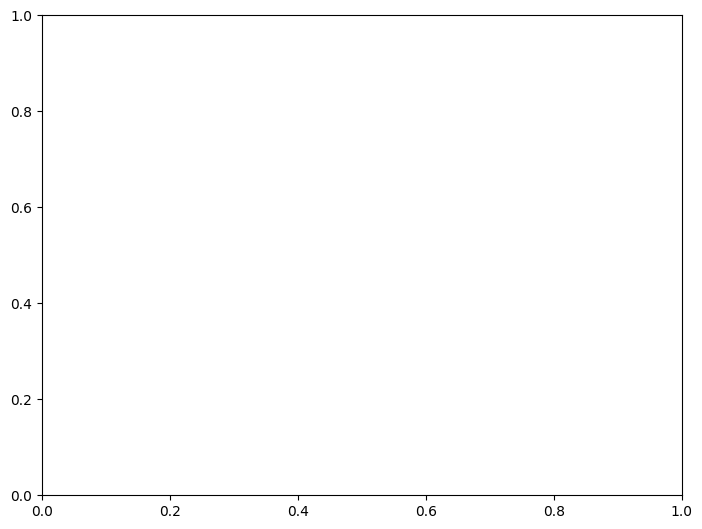

In [6]:
nx.draw(G,alpha=0.2,node_color= color_map)

In [80]:
id_to_filter= ['13824268.0','13826493.0','13828067.0','13825195.0']
rows_per_id = 100

In [81]:
filtered_df = df_graph[df_graph['escenicID'].isin(id_to_filter)]

In [8]:
def get_top_n_rows(group, n):
    return group.head(n)

In [82]:
filtered_df = filtered_df.groupby('escenicID', group_keys=False).apply(get_top_n_rows, n=rows_per_id)

In [83]:
G_filtered = nx.from_pandas_edgelist(filtered_df, source='User_IP', target= 'escenicID', create_using=nx.DiGraph())

In [76]:
filtered_df

,User_IP,escenicID
613531,c235b4096eb931049dc35b81246c00e1,13824268.0
613532,ca1cad7ca8786e3c8103ebd00f08ae30,13824268.0
613533,27a8a8676a560f79a90971964ef9c32e,13824268.0
613534,5322f918316189dd00a7911876c42e39,13824268.0
613535,33a7c74cf501f9a0cecec851924a0821,13824268.0
...,...,...
2682982,d0eee76fedc6293d0c95f175ca714d94,13828067.0
2682983,8692992312b47278097020fe979ce13d,13828067.0
2682984,6a5a5fc4dea0fc3f42c7a2361b82a705,13828067.0
2682985,fa560e166a0daa67ad2d27a3c8a3b03b,13828067.0


In [37]:
df_graph['escenicID'].unique()

array(['13869625.0', '13872808.0', '13872523.0', ..., '13895686.0',
       '13825195.0', '13834115.0'], dtype=object)

In [23]:
G_small = nx.from_pandas_edgelist(df_graph.head(100), source='User_IP', target= 'escenicID', create_using=nx.DiGraph())

In [84]:
color_map = ['red' if len(str(node)) > 10 else 'green' for node in G_filtered] #red for users, green for articles

In [9]:
#We compute the adjiacency matrix for users and articles (Maybe useful for future studies)
Adj = nx.adjacency_matrix(G).todense()
np.savetxt('Adj_matrix.csv',Adj,delimiter=',')

MemoryError: Unable to allocate 2.23 TiB for an array with shape (783439, 783439) and data type int32

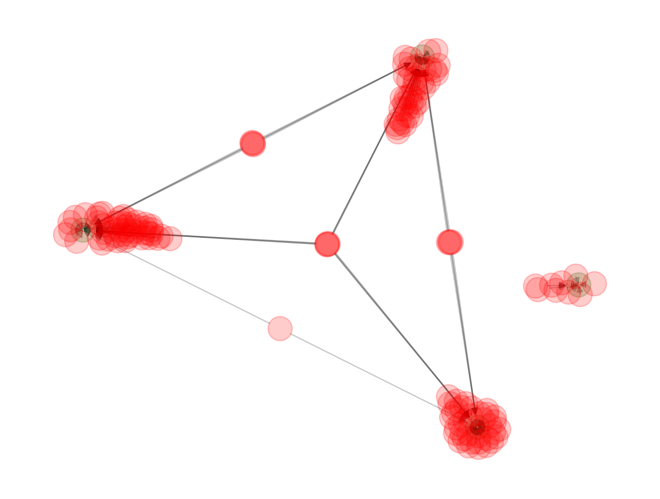

In [85]:
nx.draw(G_filtered,alpha=0.2,node_color= color_map)

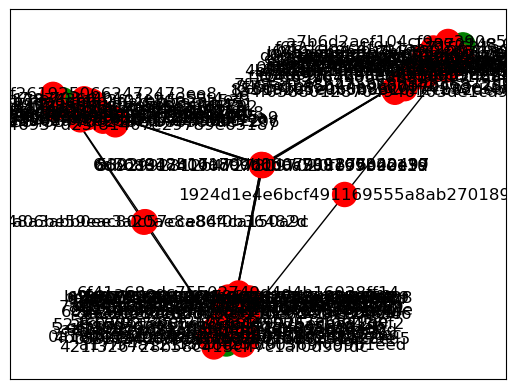

In [29]:
nx.draw_networkx(G_small,node_color= color_map) # not a good idea

In [86]:
net = Network(notebook=True,cdn_resources='in_line')

In [87]:
net.from_nx(G_small)
#How to solve error: https://stackoverflow.com/questions/72635610/assertionerror-trying-to-visualicenetworks
#Data type must be str

In [24]:
#net.barnes_hut()
net.show_buttons(filter_=['nodes'])

In [32]:
net.show('Gsmall2.html')

Gsmall2.html


## We choose a tag, e.g., politique, environnement

In [2]:
df_graph_politique = pd.read_csv('C:/Users/laura.finarell/OneDrive - HESSO/Polarizzazione/Code_Laura/pipeline/Dataset_centroid_article.csv',usecols=['labels','escenicID','iptcTags'],index_col=[0])

In [3]:
# We convert the escenicID into a str (needed for Network)
df_graph_politique['escenicID'] = df_graph_politique['escenicID'].astype(str) 

In [4]:
df_graph_politique['escenicID'] = df_graph_politique['escenicID'].str.replace("'",'')

In [5]:
df_graph_politique

,escenicID,iptcTags,labels
0,13869625.0,"['Politique', 'Gouvernement', 'Élections', 'Pa...",2
1,13874253.0,[],2
2,13872906.0,"['Sport', 'Automobile']",2
3,13874163.0,"['Sport', 'Ski alpin', 'Ski']",2
4,13762813.0,"['Science et technologie', 'Recherche scientif...",2
...,...,...,...
4523,13858239.0,"['Conflit, guerre et paix', 'Conflit armé', 'D...",0
4524,13724630.0,"['Arts, culture, divertissement et médias']",0
4525,12029415.0,"['Animaux', 'Environnement', 'Nature']",0
4526,13841603.0,"['Arts, culture, divertissement et médias']",0


In [6]:
df_graph_politique['labels'] = df_graph_politique['labels'].astype(str) 

In [7]:
df_graph_politique['labels'] = df_graph_politique['labels'].str.replace("'",'')

In [8]:
df_graph_politique['labels'] = df_graph_politique['labels'].str.replace("b",'')

In [49]:
df_graph_politique['labels'] = df_graph_politique['labels'].str.encode('utf-8')

In [9]:
politique_index = df_graph_politique[df_graph_politique['iptcTags'].str.contains('Politique') & df_graph_politique['iptcTags'].str.contains('Environnement')].index

In [138]:
politique_index

Index([  87125,   87126,   87127,   87128,   87129,   87130,   87131,   87132,
         87133,   87134,
       ...
       4785510, 4785511, 4785512, 4785513, 4785514, 4785515, 4785516, 4785517,
       4785518, 4785519],
      dtype='int64', length=143537)

In [10]:
df_graph_politique = df_graph_politique.loc[politique_index]

In [11]:
df_graph_politique.reset_index(drop=True,inplace=True)

In [12]:
df_graph_politique

,escenicID,iptcTags,labels
0,13886862.0,"['Économie et finances', 'Industrie automobile...",2
1,13892182.0,"['Économie et finances', 'Environnement', 'Ind...",2
2,13856276.0,"['Énergie et ressources', 'Économie et finance...",1
3,13834675.0,"['Politique', 'Environnement', 'Troubles civil...",1
4,13844887.0,"['Économie et finances', 'Énergie et ressource...",1
...,...,...,...
95,13887128.0,"['Environnement', 'Changement climatique', 'Po...",0
96,13870615.0,"['Économie et finances', 'Politique', 'Environ...",0
97,13856276.0,"['Énergie et ressources', 'Économie et finance...",0
98,13860881.0,"['Économie et finances', 'Énergie et ressource...",2


In [13]:
df_graph_politique['escenicID'].unique().size

25

In [9]:
filtered_pol = df_graph_politique.groupby('escenicID', group_keys=False).apply(get_top_n_rows, n=100)

In [62]:
G_politique = nx.from_pandas_edgelist(df_graph_politique, source='labels', target= 'escenicID', create_using=nx.Graph())

In [71]:
color_map = ['red' if len(str(node)) > 1 else 'green' for node in G_politique] #red for users, green for articles

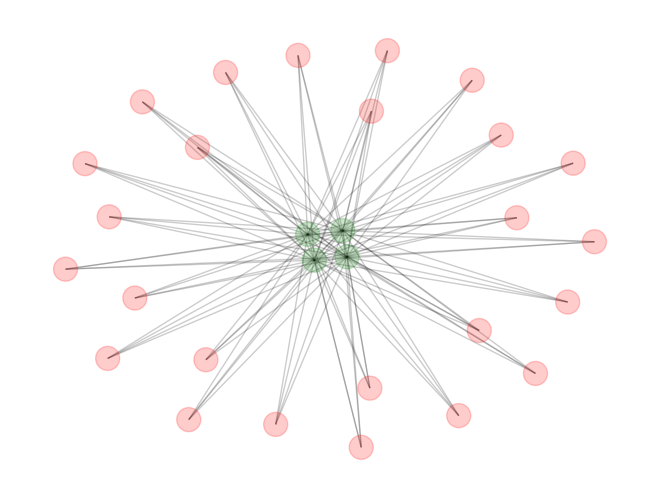

In [72]:
nx.draw(G_politique,node_color = color_map, alpha = 0.2) # Takes too much time, not worthy

In [14]:
sources = df_graph_politique['labels']
targets = df_graph_politique['escenicID']
edge_data = zip(sources, targets)

In [15]:
net = Network(notebook=True,cdn_resources='in_line')

In [16]:
for src, dst in edge_data:
    #add nodes and edges to the graph
    net.add_node(src, src, title=src, color='red')
    net.add_node(dst, dst, title=dst, color='blue')

    net.add_edge(src, dst)

In [65]:
#WE do not compile if we want coloured nodes
net.from_nx(G_politique)

In [17]:
net.barnes_hut()

In [18]:
net.show_buttons(filter_=['nodes'])
net.show_buttons(filter_=['physics'])

In [19]:
net.show('GpolCLUSTER_colored.html')

GpolCLUSTER_colored.html


UnicodeEncodeError: 'charmap' codec can't encode characters in position 263607-263621: character maps to <undefined>

In [21]:
html = net.generate_html()
with open("GpolCLUSTER_colored.html", mode='w', encoding='utf-8') as fp:
        fp.write(html)
#display(HTML(html))

In [102]:
cc = nx.connected_components(G_politique) # it does not work because our graph is direct

In [109]:
#Maybe we can do it again letting G be an indirect graph
G_pol_ind = nx.from_pandas_edgelist(df_graph_politique, 'User_IP', 'escenicID', create_using=nx.Graph())

In [115]:
cc = nx.connected_components(G_pol_ind)

In [111]:
[len(c) for c in sorted(cc, key=len, reverse=True)]

[331206]

In [116]:
largest_cc = max(cc)

In [117]:
len(largest_cc)

331206

In [118]:
largest_cc #We can investigate the other tags associated with this 'community' for example

{'f9eef63c7e3a762cd38723e5ce3940c9',
 'd242c4acbd43baa740fdb4c576e651b0',
 'cf1df5d1e4a04072dbe12a5d7d23bba0',
 '431637e8fd19c78b4f5b44d765dba719',
 '9029820b37b1c7bc8ebf643c858535c3',
 '8bf164e191f2a399c58c7c4089ee3212',
 'd771e8ec8f6e1387ac25164693fd4cbb',
 '4cee701ad398cfac78243426e1eff8df',
 'b4de1831bde2539440d0c336e7b14859',
 'd55f1c3d6e394c6f78ef65a4979a0899',
 'ae934f449a510283243e5dba4c6124b3',
 'c30a525652b82d4e5ef3dce6b3189c51',
 'c0fd2db8d1d49c53c21f89fa46e4d9f1',
 'f59ce9e61a7855bc21ec1d66054e2953',
 '1e4931e289b95531e6033aba032faf11',
 '0835a83556f9359e36d6009f14fb8a6d',
 '67c9292f50b1fa9e4c33a5889845a7f0',
 'a80f6791e005113dfd57bdf7798b051d',
 '8b7f676d116d04030ba9688e64e04afb',
 'a56db2c2cd01d0f5e3585b26292f364f',
 'aea2d1c96065a76e96635f85aa785bdb',
 'e8cdead3cb4153ddf25c37d03ea140cf',
 '8b10f8bfbf4bdf817d66fb42462945d4',
 '3f071b59a7edbad396442f5c7fe07bb0',
 '516c7f973dc9bc9671c7c4d77f8cbf90',
 'eac7b06a750d9d67afa4aa9540386fff',
 '79ee16bbba7c8f902168f763260654ad',
 